In [1]:
import os
import tensorflow as tf
import time
import numpy as np

from utils import DKT
from load_data import DKTData

import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected

In [2]:
dataset = 'a2009'

if dataset == 'a2009u':
    train_path = './data/assist2009_updated/assist2009_updated_train.csv'
    test_path = './data/assist2009_updated/assist2009_updated_test.csv'
    save_dir_prefix = './a2009u/'
elif dataset == 'a2015':
    train_path = './data/assist2015/assist2015_train.csv'
    test_path = './data/assist2015/assist2015_test.csv'
    save_dir_prefix = './a2015/'
elif dataset == 'synthetic':
    train_path = './data/synthetic/naive_c5_q50_s4000_v1_train.csv'
    test_path = './data/synthetic/naive_c5_q50_s4000_v1_test.csv'
    save_dir_prefix = './synthetic/'
elif dataset == 'statics':
    train_path = './data/STATICS/STATICS_train.csv'
    test_path = './data/STATICS/STATICS_test.csv'
    save_dir_prefix = './STATICS/'
elif dataset =='assistment_challenge':
    train_path = './data/assistment_challenge/assistment_challenge_train.csv'
    test_path = './data/assistment_challenge/assistment_challenge_test.csv'
    save_dir_prefix = './assistment_challenge/'
elif dataset == 'a2009':
    train_path = './data/skill_id_train.csv'
    test_path = './data/skill_id_test.csv'
    save_dir_prefix = './a2009/'

In [3]:
rnn_cells = {
    "LSTM": tf.contrib.rnn.LSTMCell,
    "GRU": tf.contrib.rnn.GRUCell,
    "BasicRNN": tf.contrib.rnn.BasicRNNCell,
    "LayerNormBasicLSTM": tf.contrib.rnn.LayerNormBasicLSTMCell,
}

# train_path = os.path.join('./data/', 'skill_id_train.csv')
# test_path = os.path.join('./data/', 'skill_id_test.csv')

network_config = {}
network_config['batch_size'] = 32
network_config['hidden_layer_structure'] = [200]
network_config['learning_rate'] = 0.01
network_config['keep_prob'] = 0.333
network_config['rnn_cell'] = rnn_cells["LSTM"]

network_config['lambda_o'] = 0.0
network_config['lambda_w1'] = 0.0
network_config['lambda_w2'] = 0.0

#save_dir_prefix = 'checkpoints/n200.lo0.1.lw10.03.lw230.0'

num_runs = 1
num_epochs = 1
batch_size = 32
keep_prob = 0.333

In [4]:
tf.reset_default_graph()

In [5]:
sess = tf.Session()

data = DKTData(train_path, test_path, batch_size=batch_size)
data_train = data.train
data_test = data.test
num_problems = data.num_problems

dkt_original = DKT(sess, data_train, data_test, num_problems, network_config,
          num_runs=num_runs, num_epochs=num_epochs,
          save_dir_prefix=save_dir_prefix,
          keep_prob=keep_prob, logging=False, save=False)

# load the model
dkt_original.model.build_graph()
dkt_original.load_model()

Reading ./data/skill_id_train.csv
10119 lines was read
max_num_problems_answered: 1219
num_problems: 124
The number of students is 3137
Finish reading data.
Reading ./data/skill_id_test.csv
2532 lines was read
max_num_problems_answered: 1114
num_problems: 124
The number of students is 784
Finish reading data.
ckpt_save_dir:  ./a2009/checkpoints/n200.lo0.0.lw10.0.lw20.0/
log_save_dir:  ./a2009/logs/n200.lo0.0.lw10.0.lw20.0/
Network Configuration:
rnn_cell: <class 'tensorflow.python.ops.rnn_cell_impl.LSTMCell'>
lambda_w2: 0.0
hidden_layer_structure: [200]
learning_rate: 0.01
lambda_o: 0.0
batch_size: 32
lambda_w1: 0.0
keep_prob: 0.333
Num of problems: 124
Num of run: 1
Max num of run: 1
Keep Prob: 0.333
Creating placeholder...
Creating Loss...
Creating Loss...
Create optimizer...
INFO:tensorflow:Restoring parameters from ./a2009/checkpoints/n200.lo0.0.lw10.0.lw20.0/run_0/LSTM-200/LSTM-200


In [6]:
m1_orig, m2_orig = dkt_original.consistency()
msg = '& 0.0 & 0.0 & 0.0 & {0:.5f} & {1:.5f} \\\\'.format(m1_orig, m2_orig)

In [7]:
print(dkt_original.waviness())
print(dkt_original.waviness_np())

(0.087809041671725, 0.13430784438693513)
(0.08887208330051467, 0.13511838052804828)


In [8]:
rnn_cells = {
    "LSTM": tf.contrib.rnn.LSTMCell,
    "GRU": tf.contrib.rnn.GRUCell,
    "BasicRNN": tf.contrib.rnn.BasicRNNCell,
    "LayerNormBasicLSTM": tf.contrib.rnn.LayerNormBasicLSTMCell,
}

# train_path = os.path.join('./data/', 'skill_id_train.csv')
# test_path = os.path.join('./data/', 'skill_id_test.csv')

network_config = {}
network_config['batch_size'] = 32
network_config['hidden_layer_structure'] = [200]
network_config['learning_rate'] = 0.01
network_config['keep_prob'] = 0.333
network_config['rnn_cell'] = rnn_cells["LSTM"]

network_config['lambda_o'] = 0.1
network_config['lambda_w1'] = 0.003
network_config['lambda_w2'] = 3.0

# save_dir_prefix = 'checkpoints/n200.lo0.1.lw10.03.lw230.0'

num_runs = 1
num_epochs = 1
batch_size = 32
keep_prob = 0.333

In [9]:
tf.reset_default_graph()

In [10]:
sess = tf.Session()

data = DKTData(train_path, test_path, batch_size=batch_size)
data_train = data.train
data_test = data.test
num_problems = data.num_problems

dkt = DKT(sess, data_train, data_test, num_problems, network_config,
          num_runs=num_runs, num_epochs=num_epochs,
          save_dir_prefix=save_dir_prefix,
          keep_prob=keep_prob, logging=False, save=False)

# load the model
dkt.model.build_graph()
dkt.load_model()

Reading ./data/skill_id_train.csv
10119 lines was read
max_num_problems_answered: 1219
num_problems: 124
The number of students is 3137
Finish reading data.
Reading ./data/skill_id_test.csv
2532 lines was read
max_num_problems_answered: 1114
num_problems: 124
The number of students is 784
Finish reading data.
ckpt_save_dir:  ./a2009/checkpoints/n200.lo0.1.lw10.003.lw23.0/
log_save_dir:  ./a2009/logs/n200.lo0.1.lw10.003.lw23.0/
Network Configuration:
rnn_cell: <class 'tensorflow.python.ops.rnn_cell_impl.LSTMCell'>
lambda_w2: 3.0
hidden_layer_structure: [200]
learning_rate: 0.01
lambda_o: 0.1
batch_size: 32
lambda_w1: 0.003
keep_prob: 0.333
Num of problems: 124
Num of run: 1
Max num of run: 1
Keep Prob: 0.333
Creating placeholder...
Creating Loss...
Creating Loss...
Create optimizer...
INFO:tensorflow:Restoring parameters from ./a2009/checkpoints/n200.lo0.1.lw10.003.lw23.0/run_0/LSTM-200/LSTM-200


In [11]:
m1, m2 = dkt.consistency()
msg2 = '& {0} & {1} & {2} & {3:.5f} & {4:.5f} \\\\'.format(network_config['lambda_o'],
                                                   network_config['lambda_w1'],
                                                   network_config['lambda_w2'],
                                                   m1,
                                                   m2)

In [12]:
print(msg)
print(msg2)

& 0.0 & 0.0 & 0.0 & 0.27492 & 0.01242 \\
& 0.1 & 0.003 & 3.0 & 0.45994 & 0.05684 \\


In [13]:
print(dkt.evaluate()) # return: auc_n, auc_c, total_loss
print(dkt.waviness())

(0.8214443589181255, 0.9656850940707443, 0.5134859275817871)
(0.02204011680587197, 0.048683289800347265)


In [14]:
print("original model: ", dkt_original._reconstruction_accurarcy())
print("regularized model: ", dkt._reconstruction_accurarcy())

original model:  (17766.0, 803.5501627740305, 64760)
regularized model:  (29540.0, 3680.709268659499, 64760)


# Visualization
In the following, the student output and hidden layer will be visualized.

In [15]:
problem_seqs_test = dkt.data_test.problem_seqs
correct_seqs_test = dkt.data_test.correct_seqs
targets = []
for i in range(len(problem_seqs_test)):
    num_question_answered = len(problem_seqs_test[i])
    question_ids_answered = sorted(set(problem_seqs_test[i]))
    num_distict_question = len(question_ids_answered)
    
    if 50 >= num_question_answered >= 30 and 10 >= num_distict_question >= 5:
        targets.append(i)
    
print(targets)

[1, 17, 30, 32, 35, 40, 62, 81, 88, 97, 98, 103, 126, 128, 160, 170, 207, 247, 292, 297, 298, 327, 335, 364, 366, 367, 372, 409, 415, 431, 442, 467, 492, 496, 522, 525, 531, 544, 578, 579, 583, 598, 610, 615, 621, 638, 655, 658, 664, 688, 690, 695, 699, 706, 708, 715, 724, 726, 729, 738, 758, 768, 774]


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 1080x144 with 0 Axes>

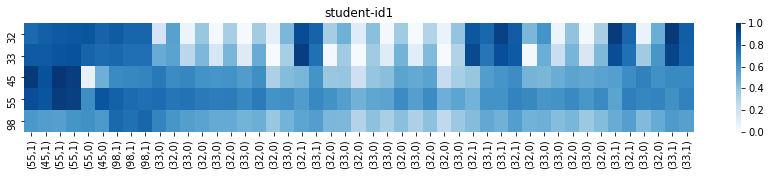

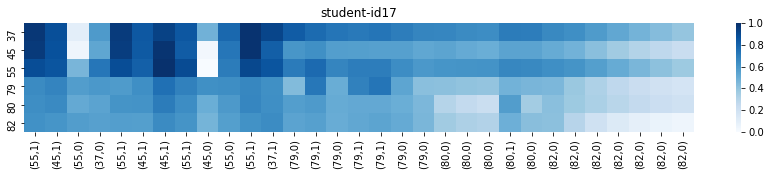

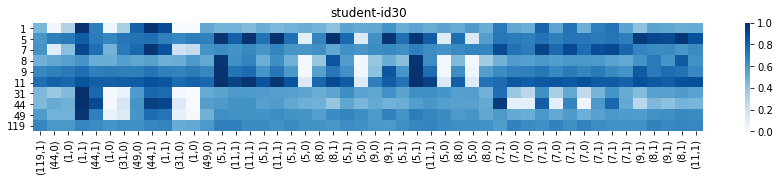

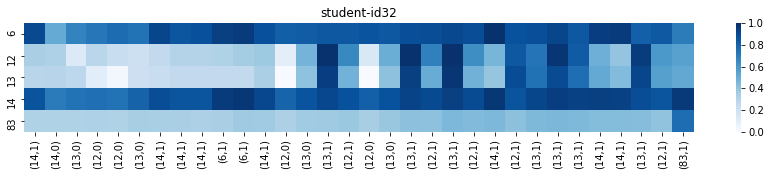

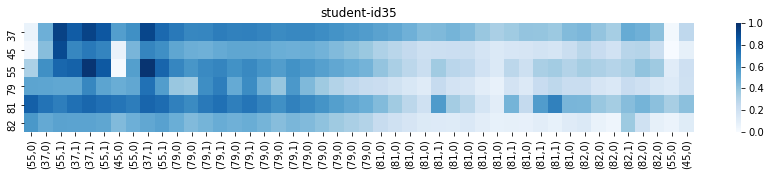

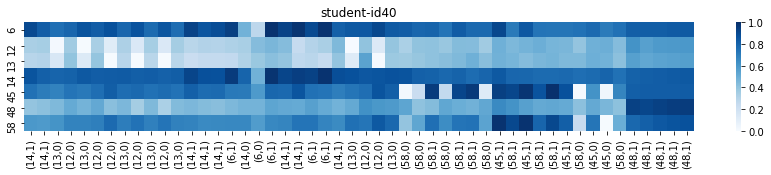

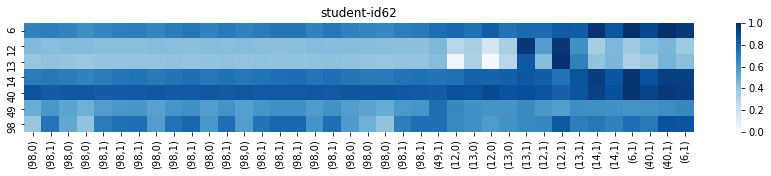

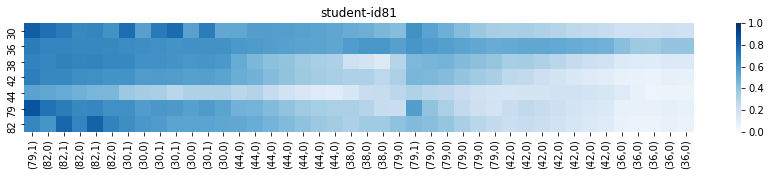

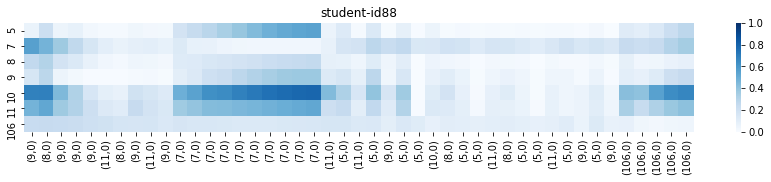

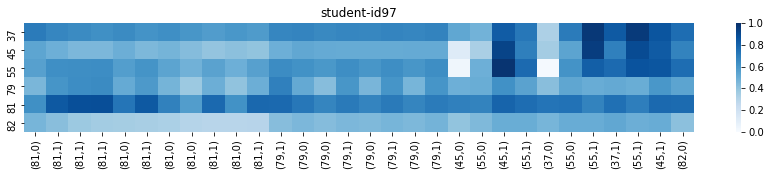

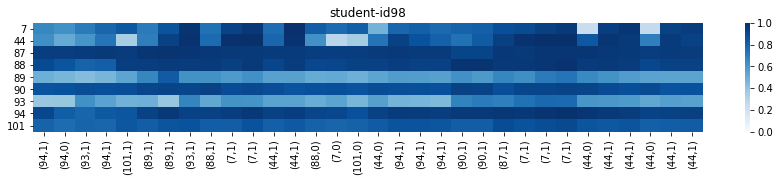

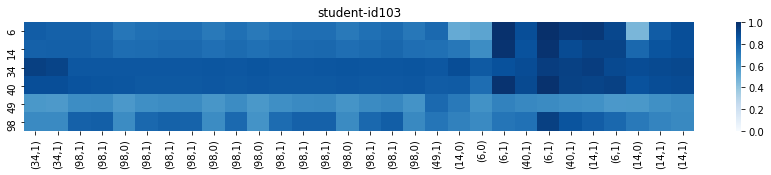

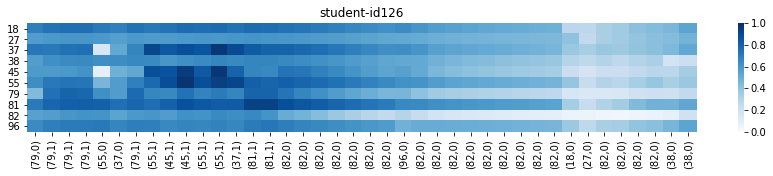

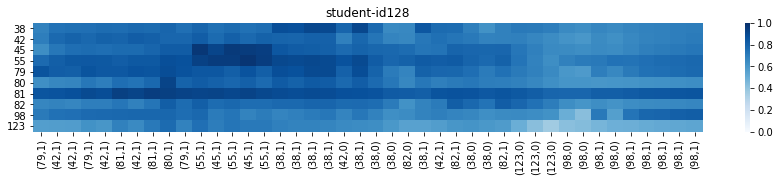

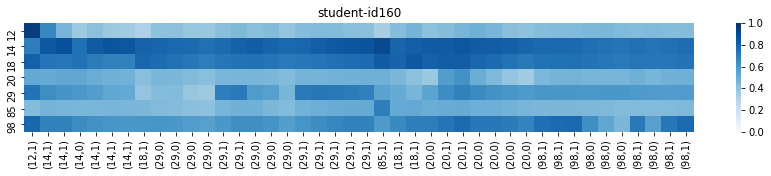

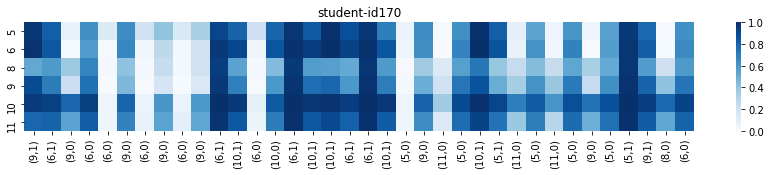

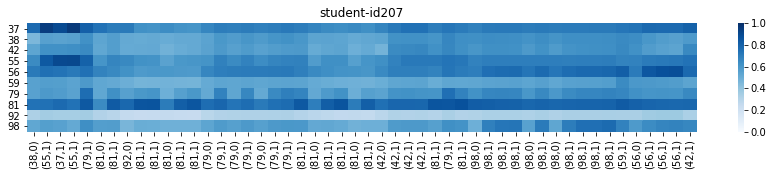

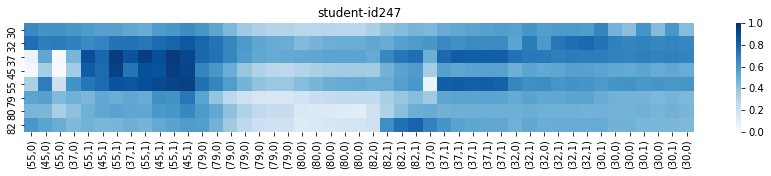

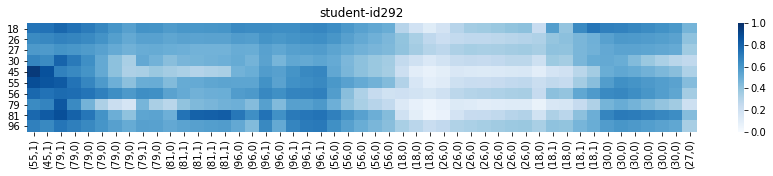

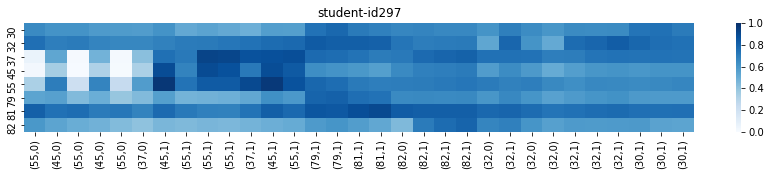

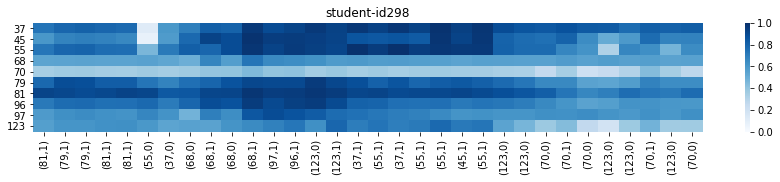

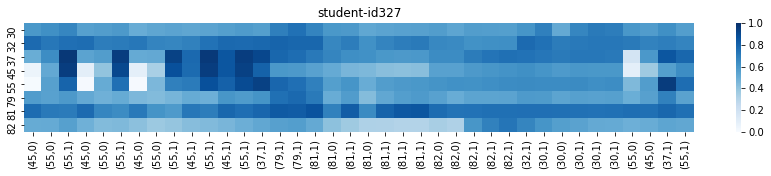

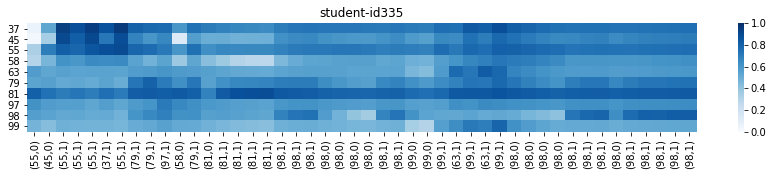

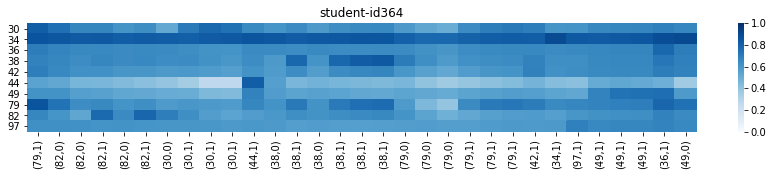

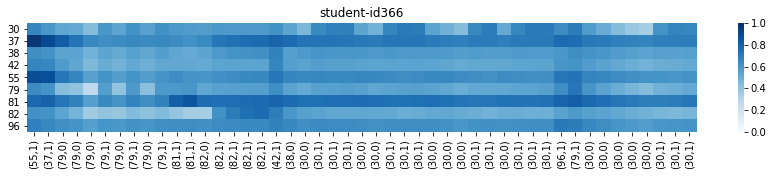

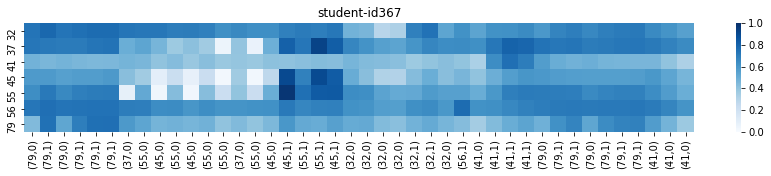

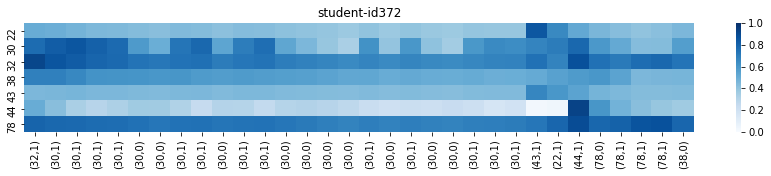

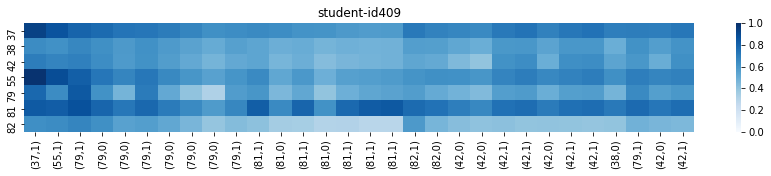

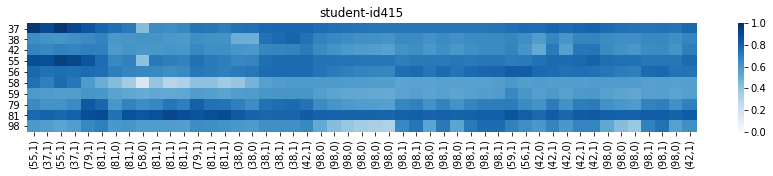

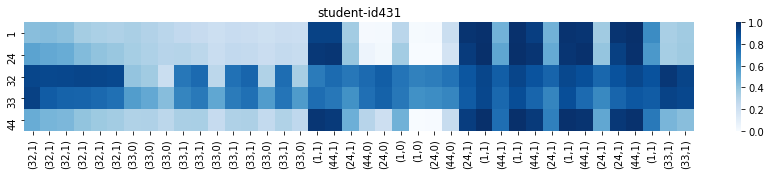

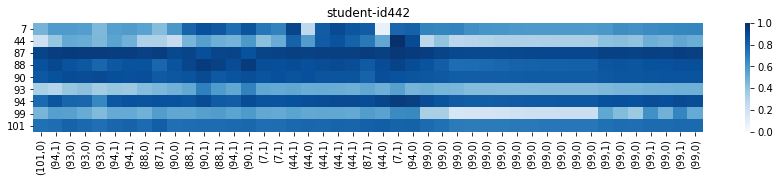

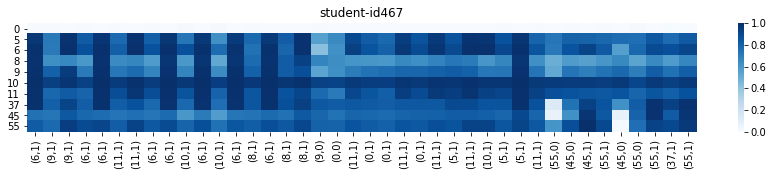

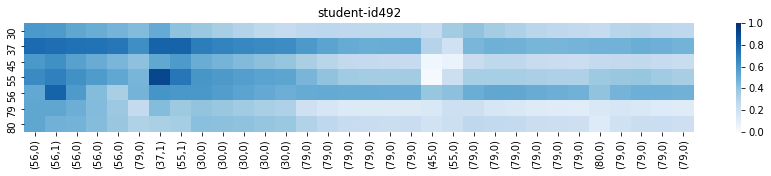

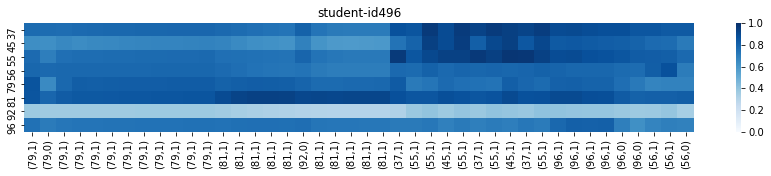

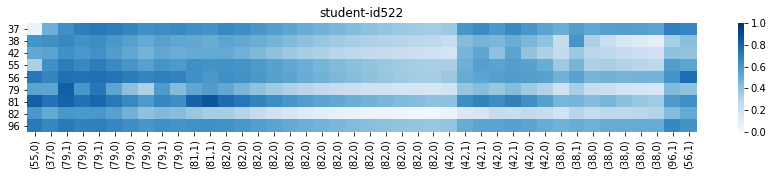

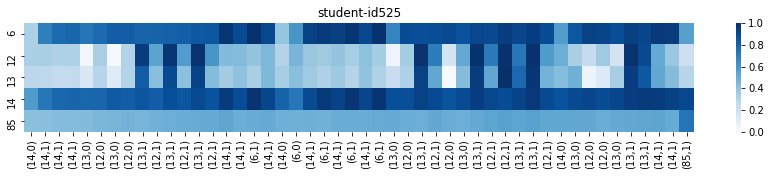

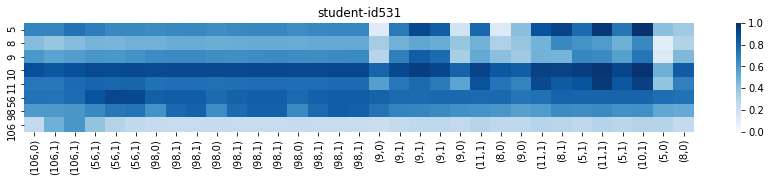

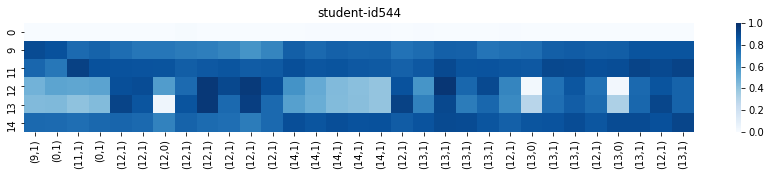

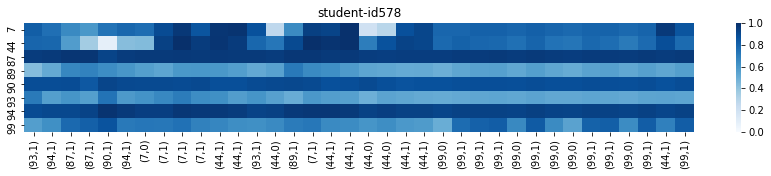

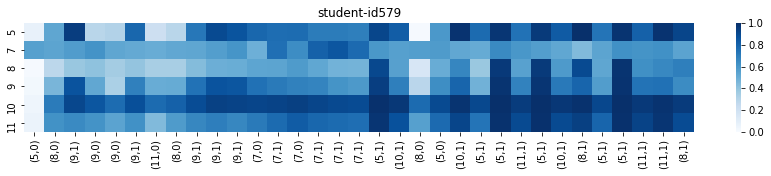

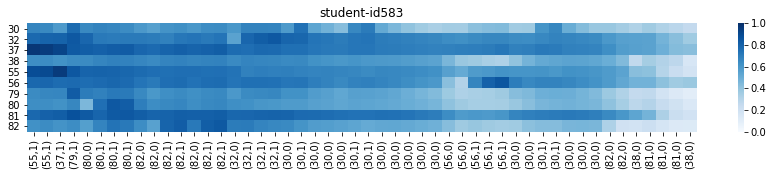

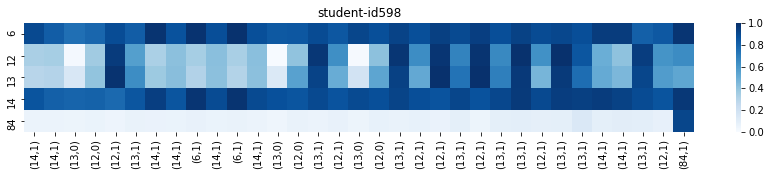

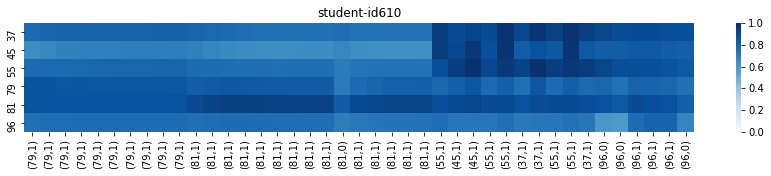

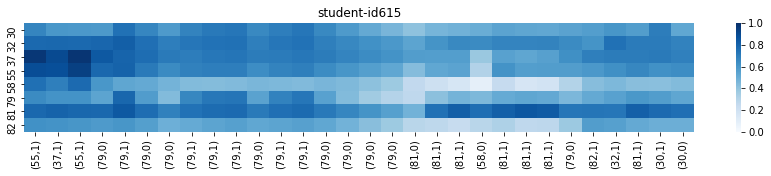

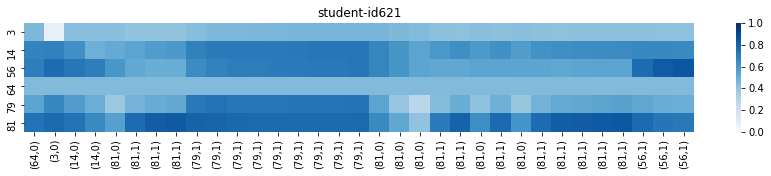

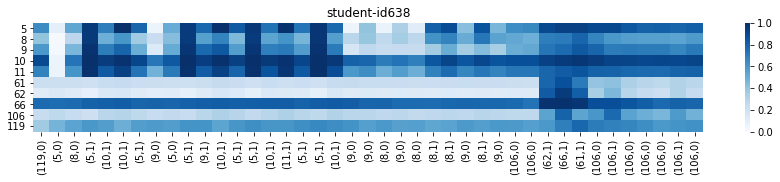

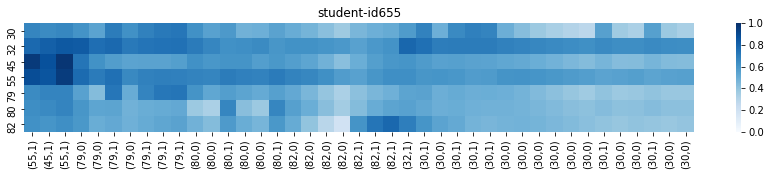

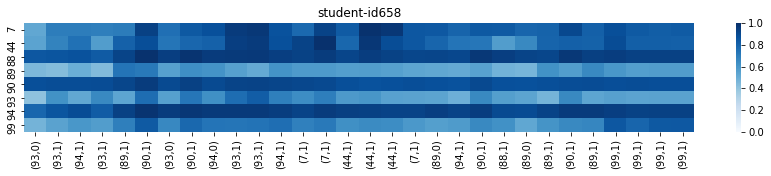

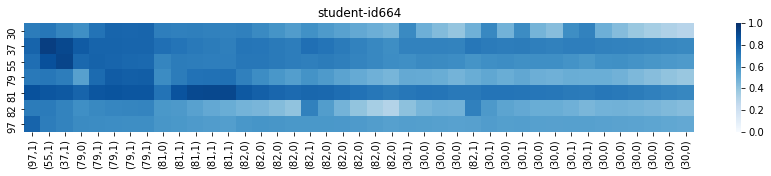

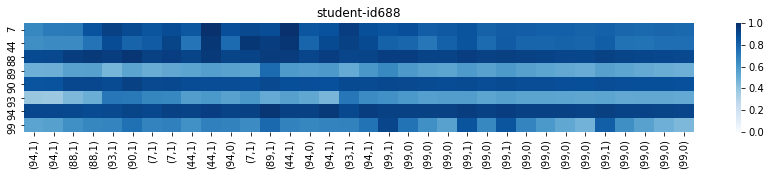

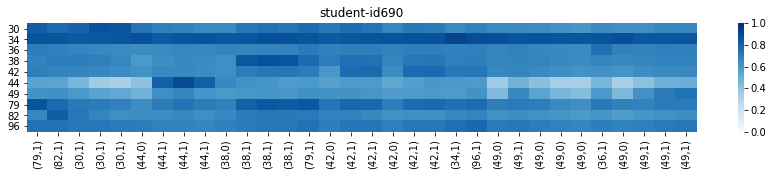

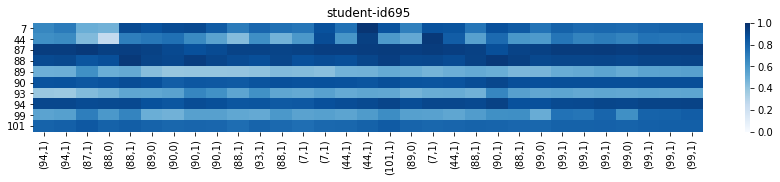

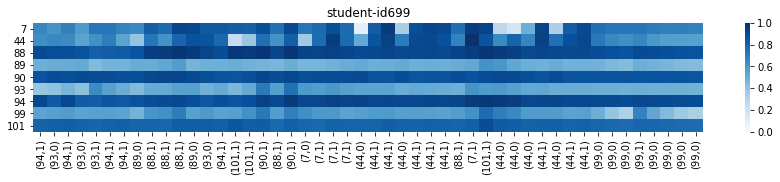

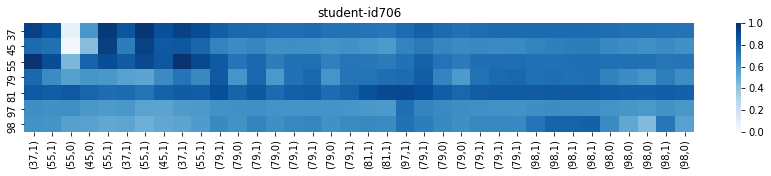

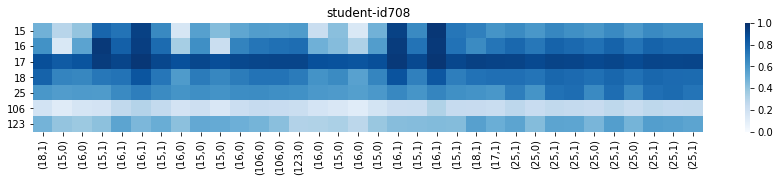

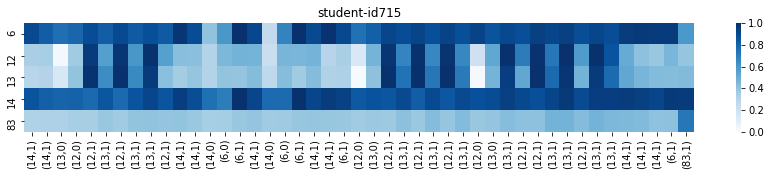

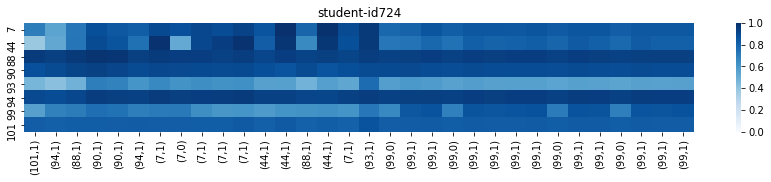

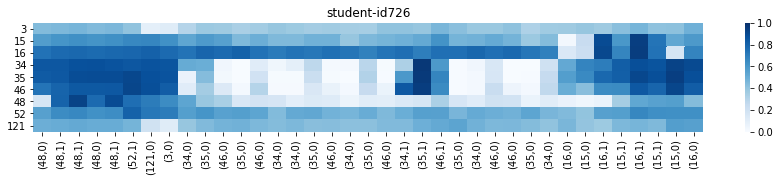

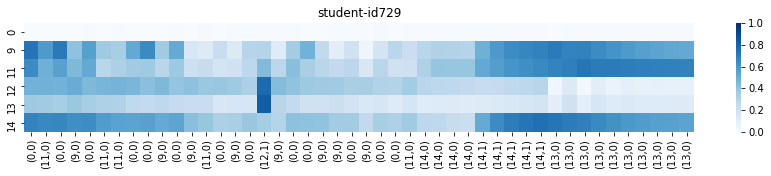

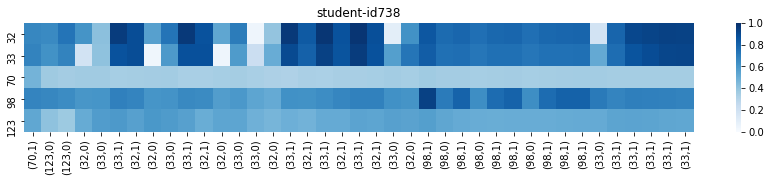

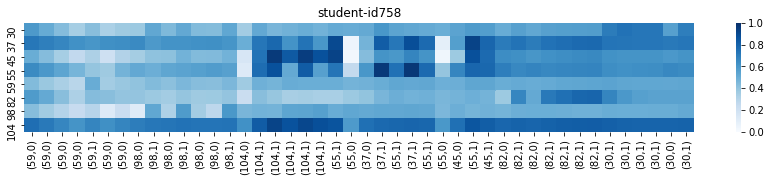

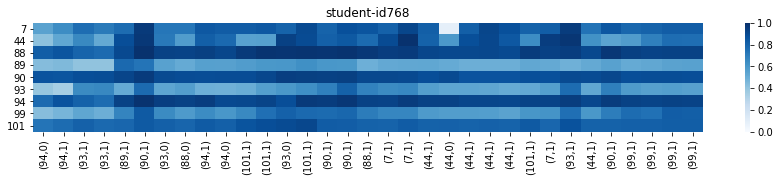

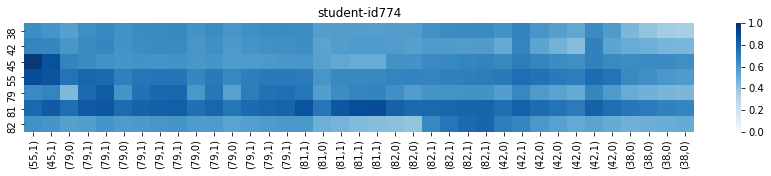

In [16]:
if True:
    plt.figure(figsize=(15, 2))
    plt.ion()
    for i, sid in enumerate(targets):
        plt.figure(i+1)
        plt.figure(figsize=(15, 2))
        plt.title('student-id{0}'.format(sid))
        num_problem_answered = len(problem_seqs_test[sid])
        problems_ids_answered = sorted(set(problem_seqs_test[sid]))
        num_distict_question = len(question_ids_answered)

        problem_seq = problem_seqs_test[sid][:num_problem_answered]
        correct_seq = correct_seqs_test[sid][:num_problem_answered]
        dkt.plot_output_layer(problem_seq=problem_seq, correct_seq=correct_seq)

In [17]:
# selecting one student to visualize
# good example: 17, 35(able to discover skill relation), 62, 81, 97, 103, 126, 128, 98, 207, 247, 292
# wavy example: 1, 30, 32, 40, 170, 297, 467, 525, 544, 578, 579, 598, 638, 715**, 729
# counter-intuitive example: 30(49(0)), 17(45(0)), 32(12(1)), *40(12(0)), 62(12(0)), 98((7(0))), 544(0(1)), 726(34(0))
sid = 1
num_problem_answered = len(problem_seqs_test[sid])
problems_ids_answered = sorted(set(problem_seqs_test[sid]))
num_distict_question = len(question_ids_answered)

problem_seq = problem_seqs_test[sid][:num_problem_answered]
correct_seq = correct_seqs_test[sid][:num_problem_answered]

print(num_problem_answered)
print(problem_seq)
print(correct_seq)

47
[55, 45, 55, 55, 55, 45, 98, 98, 98, 33, 32, 33, 32, 33, 32, 33, 32, 32, 33, 32, 33, 32, 33, 32, 33, 33, 32, 33, 32, 32, 33, 32, 33, 33, 32, 32, 33, 33, 32, 33, 32, 33, 32, 33, 32, 33, 33]
[1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1]


## Visualizing the Output Layer

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
output_dkt = dkt.get_output_layer([problem_seq], [correct_seq])
output_original = dkt_original.get_output_layer([problem_seq], [correct_seq])

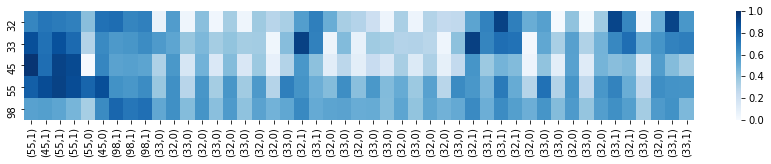

In [20]:
plt.figure(figsize=(15, 2))
dkt_fig = dkt_original.plot_output_layer(problem_seq=problem_seq, correct_seq=correct_seq)

figure = dkt_fig.get_figure()    
figure.savefig('dkt_id1.pdf', bbox_inches='tight')#, bbox_extra_artist=[lgd])

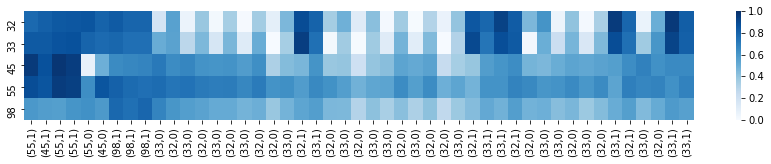

In [21]:
plt.figure(figsize=(15, 2))
dkt.plot_output_layer(problem_seq=problem_seq, correct_seq=correct_seq)

figure = dkt_fig.get_figure() 
plt.savefig('dktr_id1.pdf', bbox_inches='tight')

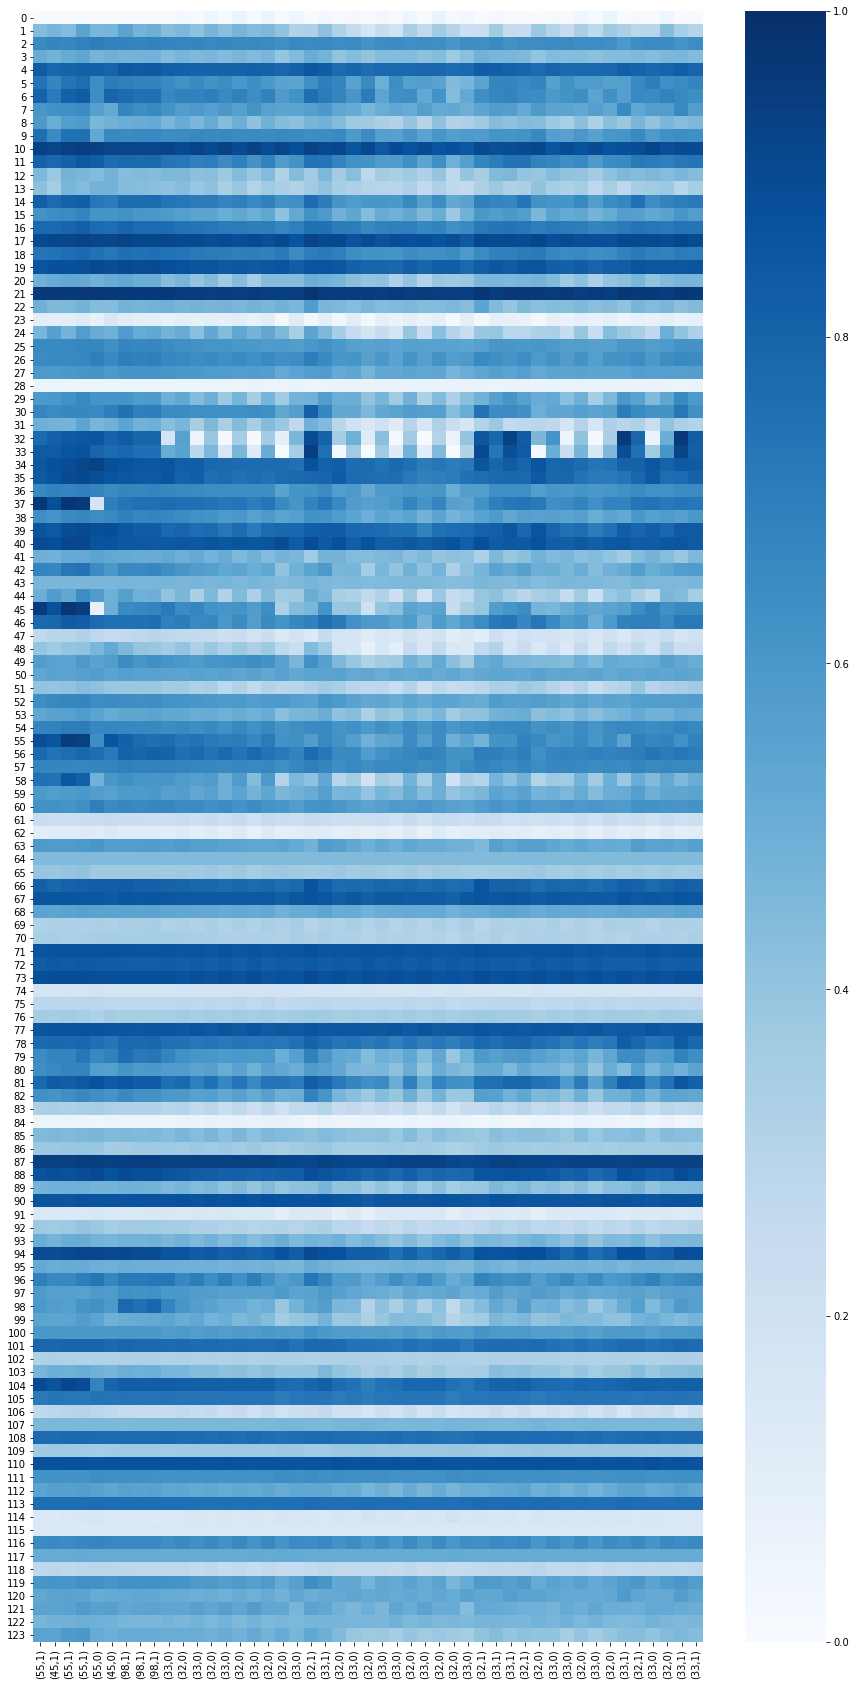

In [22]:
plt.figure(figsize=(15, 30))
dkt.plot_output_layer(problem_seq=problem_seq, correct_seq=correct_seq, 
                      target_problem_ids=range(124))

In [23]:
problem_seq_aug = problem_seq + [21] * 50
correct_seq_aug = correct_seq + [1, 0] * 25

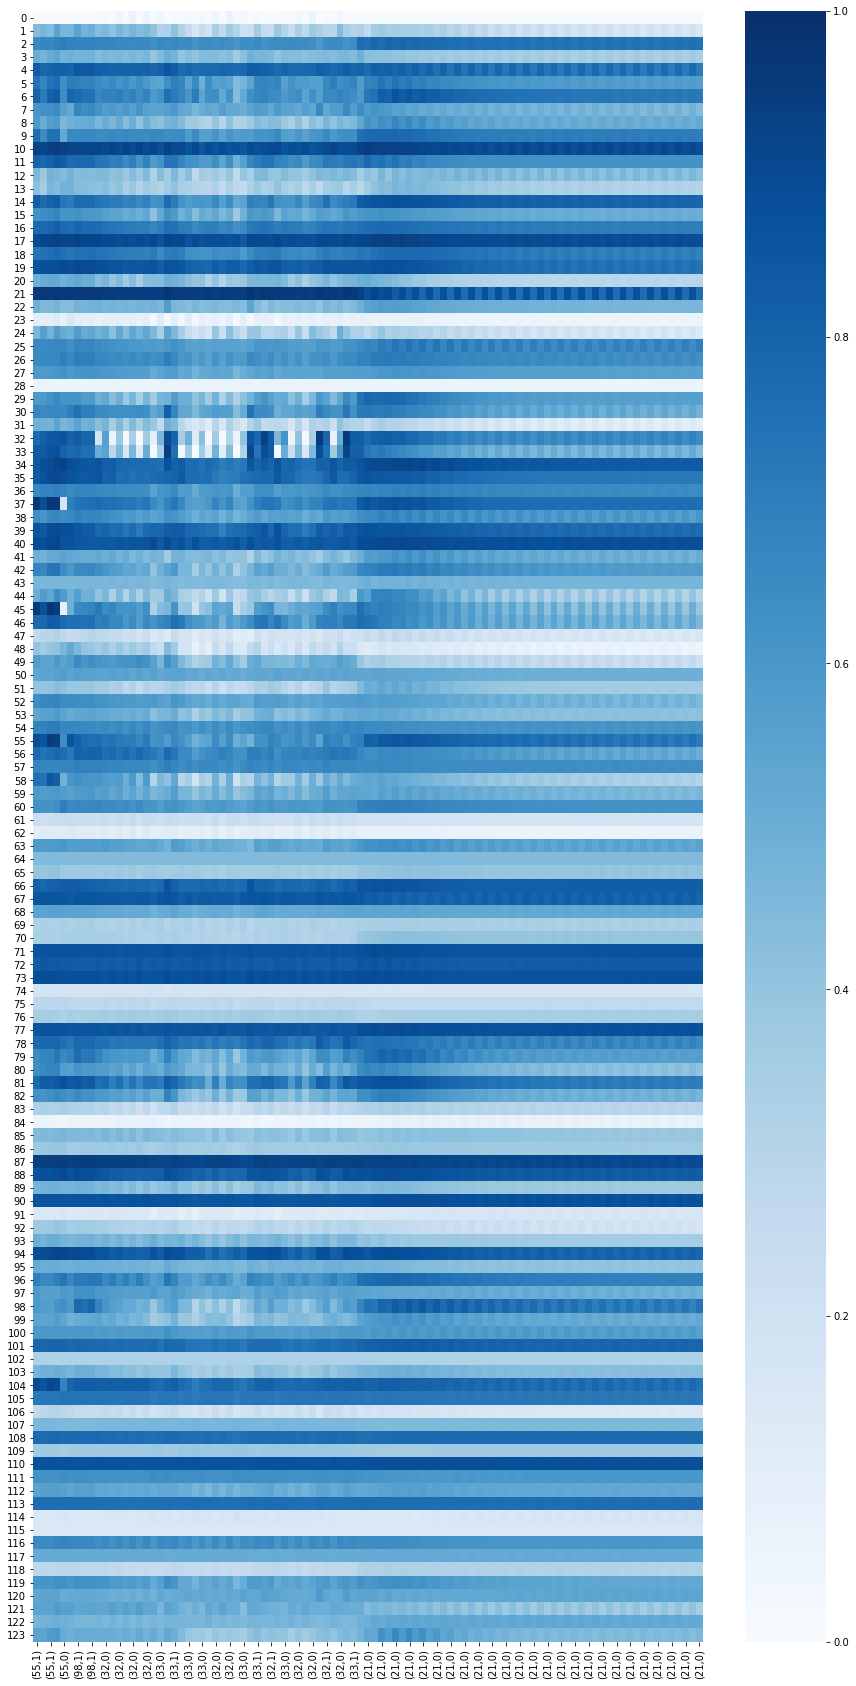

In [24]:
plt.figure(figsize=(15, 30))
dkt.plot_output_layer(problem_seq=problem_seq_aug, correct_seq=correct_seq_aug, 
                      target_problem_ids=range(124))

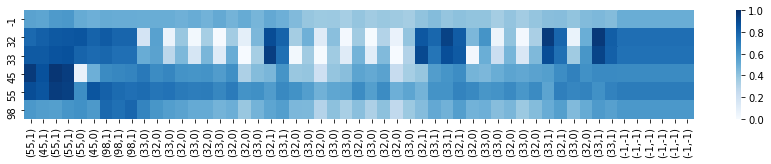

In [25]:
plt.figure(figsize=(15, 2))
problem_seq = [55, 45, 55, 55, 55, 45, 98, 98, 98,
               33, 32, 33, 32, 33, 32, 33, 32, 32,
               33, 32, 33, 32, 33, 32, 33, 33, 32,
               33, 32, 32, 33, 32, 33, 33, 32, 32, 
               33, 33, 32, 33, 32, 33, 32, 33, 32, 
               33, 33, -1, -1, -1, -1, -1, -1]
correct_seq = [1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
               1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
               0, 1, 1, 0, 0, 1, 1, -1, -1, -1, -1, -1, -1]
dkt.plot_output_layer(problem_seq=problem_seq, correct_seq=correct_seq)

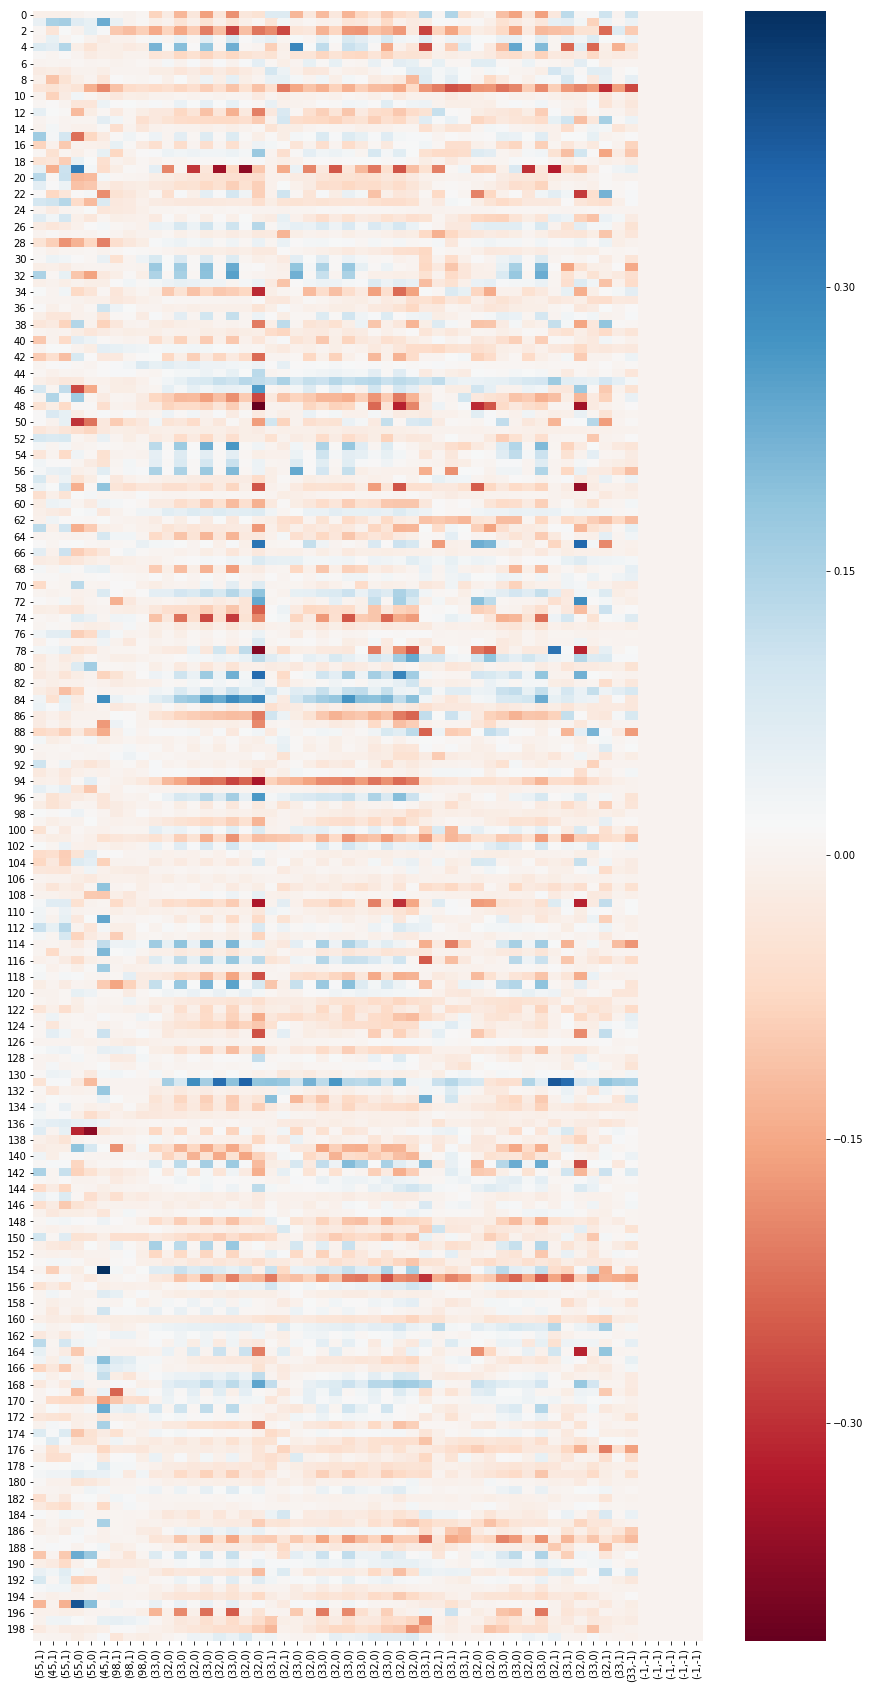

In [26]:
plt.figure(figsize=(15, 30))
dkt.plot_hidden_layer(problem_seq=problem_seq, correct_seq=correct_seq[1:], layer=0)

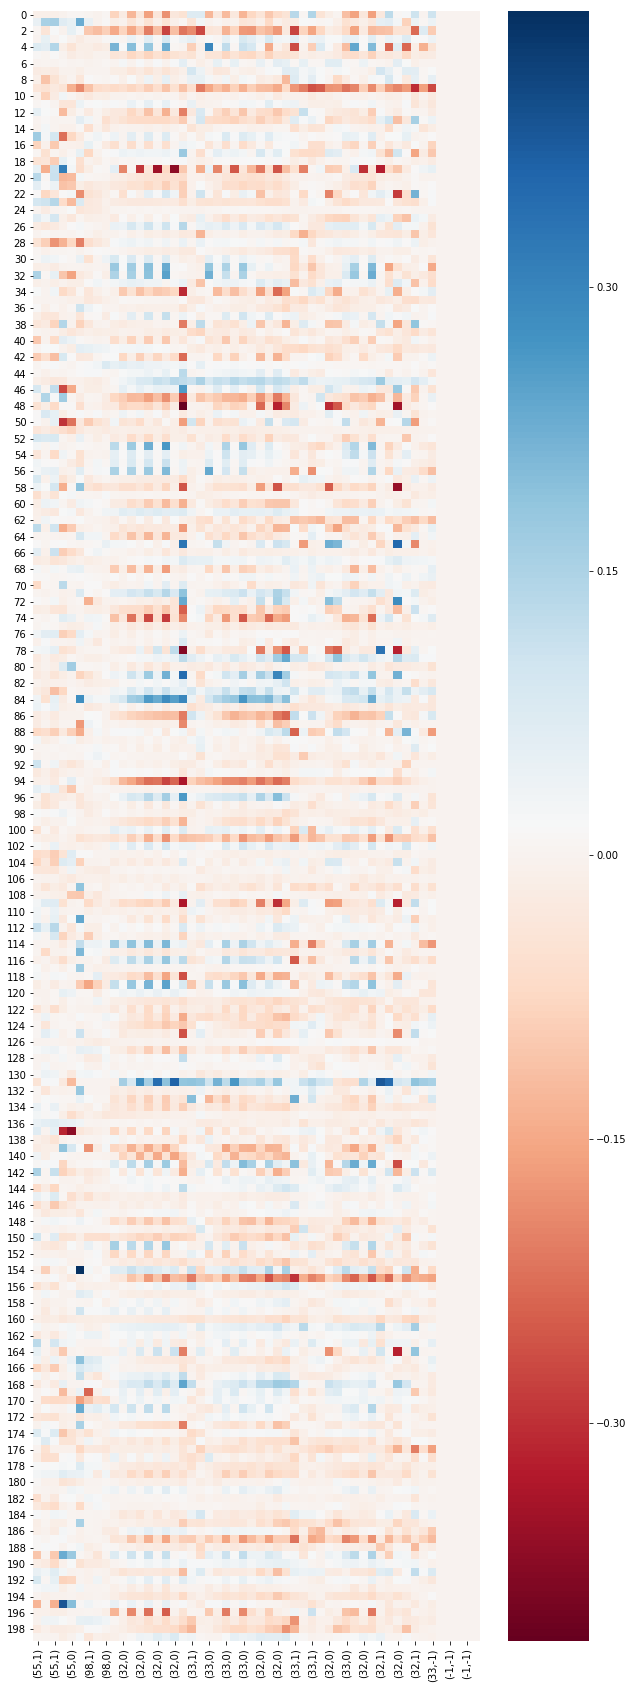

In [27]:
plt.figure(figsize=(10, 30))
dkt.plot_hidden_layer(problem_seq=problem_seq, correct_seq=correct_seq[1:], layer=0)

# Comparing two dkt output

In [28]:
output_dkt = dkt.get_output_layer([problem_seq], [correct_seq])[0]
output_original = dkt_original.get_output_layer([problem_seq], [correct_seq])[0]

In [29]:
output_dkt.shape

(53, 124)

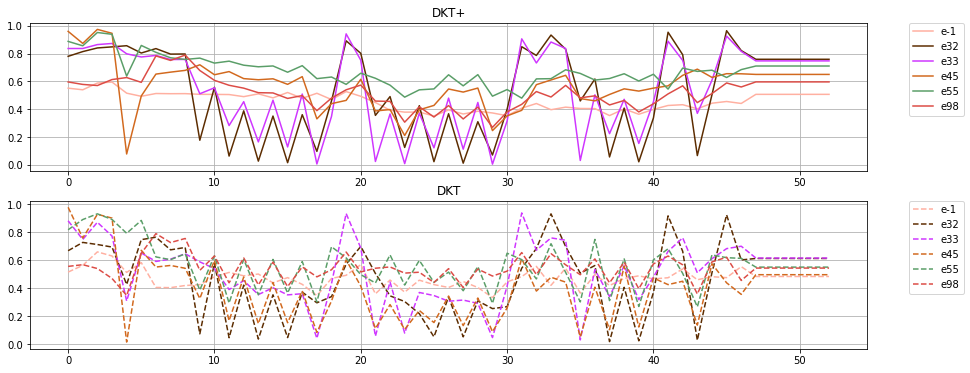

In [30]:
# red dashes, blue squares and green triangles
problem_ids_answered = sorted(set(problem_seq))
target_problem_ids = problem_ids_answered

# get_output_layer return output in shape (1, 38, 124)
output_dkt = dkt.get_output_layer([problem_seq], [correct_seq])[0]
output_original = dkt_original.get_output_layer([problem_seq], [correct_seq])[0]
output_dkt = np.transpose(output_dkt[:, target_problem_ids])  # shape (?, 38)
output_original = np.transpose(output_original[:, target_problem_ids])

timesteps = range(output_original.shape[1])

plt.figure(figsize=(15, 6))
plt.figure(1)
plt.subplot(211)
plt_legends = []
color_list = [
    '#ffb0a1', 
    '#5c2c00',
    '#cf36ff',
    '#d2691e',
    '#5a9e68', 
    '#dc4c46',
    '#672E3B',
    '#F3D6E4',
    '#223a5e',
    '#005960',
]
for i in range(output_original.shape[0]):
    _plot = plt.plot(timesteps, output_dkt[i], '-', color=color_list[i], label='e{0}'.format(target_problem_ids[i]))
    plt_legends.append(_plot)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('DKT+')
plt.grid(True)


plt.subplot(212)
for i in range(output_original.shape[0]):
    _plot = plt.plot(timesteps, output_original[i], '--', color=color_list[i], label='e{0}'.format(target_problem_ids[i]))
    plt_legends.append(_plot)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('DKT')
plt.grid(True)
# plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

# plt.tight_layout()
plt.savefig('comparison_id1.pdf', bbox_inches='tight')

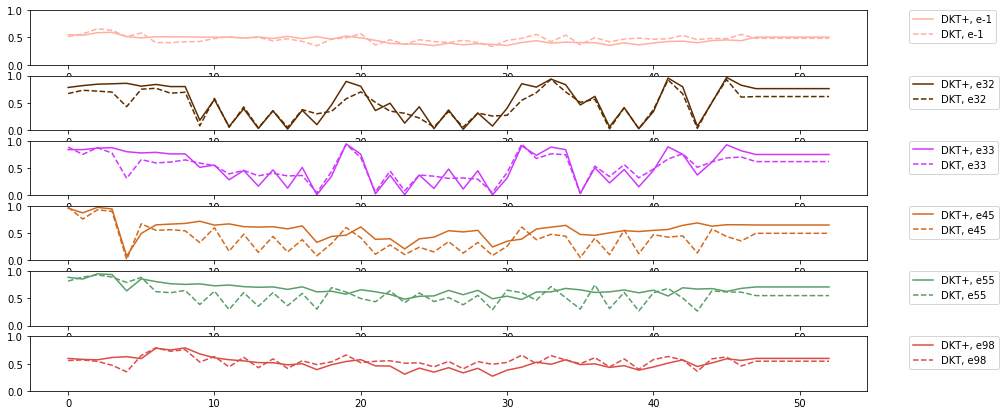

In [31]:
# red dashes, blue squares and green triangles
problem_ids_answered = sorted(set(problem_seq))
target_problem_ids = problem_ids_answered
num_problem = len(target_problem_ids)

# get_output_layer return output in shape (1, 38, 124)
output_dkt = dkt.get_output_layer([problem_seq], [correct_seq])[0]
output_original = dkt_original.get_output_layer([problem_seq], [correct_seq])[0]
output_dkt = np.transpose(output_dkt[:, target_problem_ids])  # shape (?, 38)
output_original = np.transpose(output_original[:, target_problem_ids])

timesteps = range(output_original.shape[1])

subplot_base = 100*num_problem + 10
plt.figure(figsize=(15, 7))
plt.figure(1)
color_list = [
    '#ffb0a1', 
    '#5c2c00',
    '#cf36ff',
    '#d2691e',
    '#5a9e68', 
    '#dc4c46',
    '#672E3B',
    '#F3D6E4',
    '#223a5e',
    '#005960',
]

for i in range(num_problem):
    plt.subplot(subplot_base + i + 1)
    plt.plot(timesteps, output_dkt[i], '-', color=color_list[i], label='DKT+, e{0}'.format(target_problem_ids[i]))
    plt.plot(timesteps, output_original[i], '--', color=color_list[i], label='DKT, e{0}'.format(target_problem_ids[i]))
#     plt.title('{0}'.format(target_problem_ids[i]))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylim([0.0, 1.0])

# for i in range(output_original.shape[0]):
#     _plot = plt.plot(timesteps, output_dkt[i], '-', color=color_list[i], label='{0}'.format(target_problem_ids[i]))
#     plt_legends.append(_plot)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.title('DKT+')
# plt.grid(True)


# plt.subplot(212)
# for i in range(output_original.shape[0]):
#     _plot = plt.plot(timesteps, output_original[i], '--', color=color_list[i], label='{0}'.format(target_problem_ids[i]))
#     plt_legends.append(_plot)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.title('DKT')
# plt.grid(True)
# # plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

# fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()

# plt.tight_layout()
plt.savefig('comparison_v2_id1.pdf', bbox_inches='tight')

## Appendix
Skill id to name
```
0 (1.0, 'Box and Whisker')
1 (2.0, 'Circle Graph')
2 (4.0, 'Histogram as Table or Graph')
3 (5.0, 'Number Line')
4 (8.0, 'Scatter Plot')
5 (9.0, 'Stem and Leaf Plot')
6 (10.0, 'Table')
7 (11.0, 'Venn Diagram')
8 (12.0, 'Mean')
9 (13.0, 'Median')
10 (14.0, 'Mode')
11 (15.0, 'Range')
12 (16.0, 'Counting Methods')
13 (17.0, 'Probability of Two Distinct Events')
14 (18.0, 'Probability of a Single Event')
15 (21.0, 'Interior Angles Figures with More than 3 Sides')
16 (22.0, 'Interior Angles Triangle')
17 (24.0, 'Congruence')
18 (25.0, 'Complementary and Supplementary Angles')
19 (26.0, 'Angles on Parallel Lines Cut by a Transversal')
20 (27.0, 'Pythagorean Theorem')
21 (32.0, 'Nets of 3D Figures')
22 (34.0, 'Unit Conversion Within a System')
23 (35.0, 'Effect of Changing Dimensions of a Shape Prportionally')
24 (37.0, nan)
25 (39.0, 'Area Circle')
26 (40.0, 'Circumference ')
27 (42.0, 'Perimeter of a Polygon')
28 (43.0, 'Reading a Ruler or Scale')
29 (46.0, 'Calculations with Similar Figures')
30 (47.0, 'Conversion of Fraction Decimals Percents')
31 (48.0, 'Equivalent Fractions')
32 (49.0, 'Ordering Positive Decimals')
33 (50.0, 'Ordering Fractions')
34 (51.0, 'Ordering Integers')
35 (53.0, 'Ordering Real Numbers')
36 (54.0, 'Rounding')
37 (58.0, 'Addition Whole Numbers')
38 (61.0, 'Division Fractions')
39 (63.0, 'Estimation')
40 (64.0, 'Fraction Of')
41 (65.0, 'Least Common Multiple')
42 (67.0, 'Multiplication Fractions')
43 (69.0, 'Multiplication Whole Numbers')
44 (70.0, 'Percent Of')
45 (74.0, 'Subtraction Whole Numbers')
46 (75.0, 'Square Root')
47 (76.0, nan)
48 (77.0, 'Finding Percents')
49 (79.0, 'Proportion')
50 (80.0, 'Scale Factor')
51 (81.0, 'Unit Rate')
52 (82.0, 'Scientific Notation')
53 (83.0, 'Divisibility Rules')
54 (84.0, 'Prime Number')
55 (85.0, 'Absolute Value')
56 (86.0, 'Exponents')
57 (91.0, nan)
58 (92.0, 'Pattern Finding ')
59 (94.0, nan)
60 (96.0, nan)
61 (97.0, nan)
62 (99.0, nan)
63 (101.0, nan)
64 (102.0, nan)
65 (104.0, nan)
66 (105.0, nan)
67 (110.0, 'D.4.8-understanding-concept-of-probabilities')
68 (163.0, 'Absolute Value')
69 (165.0, 'Algebraic Simplification')
70 (166.0, 'Algebraic Solving')
71 (173.0, 'Choose an Equation from Given Information')
72 (190.0, 'Intercept')
73 (193.0, 'Linear Equations')
74 (203.0, 'Percent Discount')
75 (204.0, 'Percents')
76 (217.0, 'Rate')
77 (221.0, 'Slope')
78 (276.0, 'Multiplication and Division Positive Decimals')
79 (277.0, 'Addition and Subtraction Integers')
80 (278.0, 'Addition and Subtraction Positive Decimals')
81 (279.0, 'Multiplication and Division Integers')
82 (280.0, 'Addition and Subtraction Fractions')
83 (290.0, 'Reflection')
84 (292.0, 'Rotations')
85 (293.0, 'Translations')
86 (294.0, 'Area Irregular Figure')
87 (295.0, 'Area Parallelogram')
88 (296.0, 'Area Rectangle')
89 (297.0, 'Area Trapezoid')
90 (298.0, 'Area Triangle')
91 (299.0, 'Surface Area Cylinder')
92 (301.0, 'Surface Area Rectangular Prism')
93 (303.0, 'Volume Cylinder')
94 (307.0, 'Volume Rectangular Prism')
95 (308.0, 'Volume Sphere')
96 (309.0, 'Order of Operations +,-,/,* () positive reals')
97 (310.0, 'Order of Operations All')
98 (311.0, 'Equation Solving Two or Fewer Steps')
99 (312.0, 'Equation Solving More Than Two Steps')
100 (314.0, 'Angles - Obtuse, Acute, and Right')
101 (317.0, 'Greatest Common Factor')
102 (321.0, 'Computation with Real Numbers')
103 (322.0, 'Write Linear Equation from Ordered Pairs')
104 (323.0, 'Write Linear Equation from Situation')
105 (324.0, 'Recognize Linear Pattern')
106 (325.0, 'Write Linear Equation from Graph')
107 (331.0, 'Finding Slope From Situation')
108 (333.0, 'Finding Slope From Equation')
109 (334.0, 'Finding Slope from Ordered Pairs')
110 (340.0, 'Distributive Property')
111 (343.0, 'Midpoint')
112 (346.0, 'Polynomial Factors')
113 (348.0, 'Recognize Quadratic Pattern')
114 (350.0, 'Solving Systems of Linear Equations')
115 (356.0, 'Quadratic Formula to Solve Quadratic Equation')
116 (362.0, 'Parts of a Polyomial, Terms, Coefficient, Monomial, Exponent, Variable')
117 (365.0, 'Interpreting Coordinate Graphs ')
118 (367.0, nan)
119 (368.0, 'Solving for a variable')
120 (371.0, 'Simplifying Expressions positive exponents')
121 (375.0, 'Solving Inequalities')
122 (378.0, 'Solving Systems of Linear Equations by Graphing')
123 (0.0, nan)
```